## Import Pustaka

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

%matplotlib inline
import matplotlib.pyplot as plt
import pickle


## Data Loading

In [4]:
df = pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")

In [5]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dataset yang digunakan yaitu Heart Failure Prediction yang berisi record data pasien yang mengalami gagal jantung. Dataset ini terdiri dari 13 colomns dan 299 data.

Atribut dalam dataset ini antara lain :

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes (0 = non-diabetes, 1 = diabetes)
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up (0 = live, 1 = dead)

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Ekplorasi Data

In [9]:
cafe_colors = ['rgb(79, 129, 102)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']

Jumlah Kasus yang Hidup: 203
 Jumlah Kasus yang Meniggal: 96


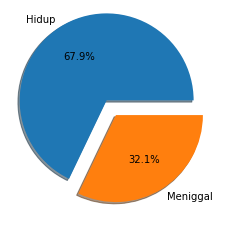

In [10]:
len_live = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 0])
len_death = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 1])

print(f'Jumlah Kasus yang Hidup: {len_live}')
print(f' Jumlah Kasus yang Meniggal: {len_death}')

arr = np.array([len_live, len_death])
labels = ['Hidup','Meniggal']

plt.pie(arr, labels = labels, explode=[0.2,0.0], shadow = True, autopct='%1.1f%%')
plt.show()

<AxesSubplot:>

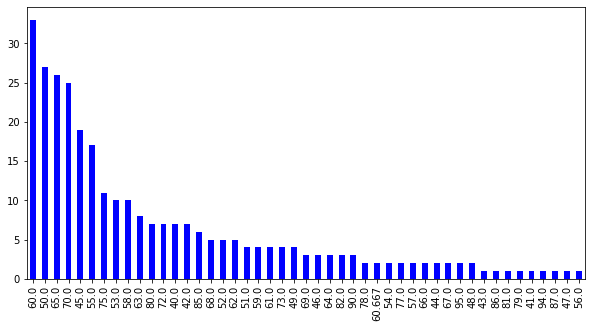

In [11]:
df['age'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

Dari histogram variabel di atas dapat dilihat persebaran umur pasien yaitu ada dari 40 hingga sekitar 95 tahun, dan frekuensi terbanyak yaitu pasien berusia 50 hingga 60 an.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

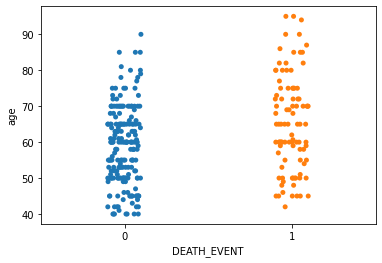

In [12]:
sns.stripplot(data=df, x='DEATH_EVENT', y='age')

Jumlah yang Meninggal: 85
Jumlah yang tidak Meninggal: 167


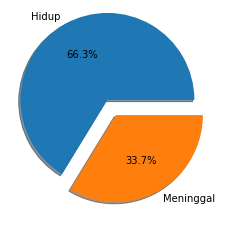

In [13]:
age_above_50_not_died = df['DEATH_EVENT'][df.age >=50][df.DEATH_EVENT == 0]
age_above_50_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_not_died, len_died])
labels =['Hidup','Meninggal']

print(f'Jumlah yang Meninggal: {len_died}')
print(f'Jumlah yang tidak Meninggal: {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

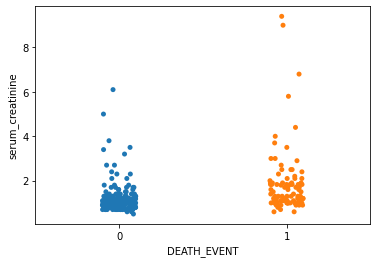

In [14]:
sns.stripplot(data=df, x='DEATH_EVENT', y='serum_creatinine')

## Data Preprocessing

<AxesSubplot:>

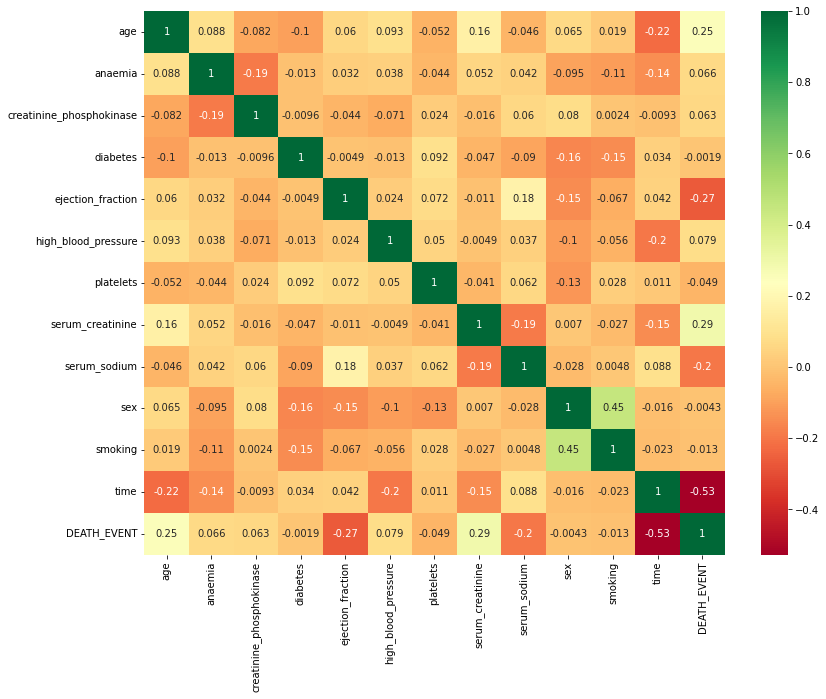

In [15]:
corr = df.corr()
top_corr = corr.index
plt.figure(figsize=(13,10))
sns.heatmap(df[top_corr].corr(),annot=True,cmap="RdYlGn")

In [16]:
df_pred = df[['age','serum_creatinine','DEATH_EVENT']]

In [17]:
df_pred

,age,serum_creatinine,DEATH_EVENT
0,75.0,1.9,1
1,55.0,1.1,1
2,65.0,1.3,1
3,50.0,1.9,1
4,65.0,2.7,1
...,...,...,...
294,62.0,1.1,0
295,55.0,1.2,0
296,45.0,0.8,0
297,45.0,1.4,0


In [18]:
df_pred.describe()

,age,serum_creatinine,DEATH_EVENT
count,299.000000,299.00000,299.00000
mean,60.833893,1.39388,0.32107
std,11.894809,1.03451,0.46767
min,40.000000,0.50000,0.00000
25%,51.000000,0.90000,0.00000
50%,60.000000,1.10000,0.00000
75%,70.000000,1.40000,1.00000
max,95.000000,9.40000,1.00000


## Pendefinisian Model

In [19]:
x = df_pred.drop("DEATH_EVENT", axis=1)
y = df_pred["DEATH_EVENT"]

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [21]:
x

array([[ 1.19294523e+00,  4.90056987e-01],
       [-4.91279276e-01, -2.84552352e-01],
       [ 3.50832977e-01, -9.09000174e-02],
       [-9.12335403e-01,  4.90056987e-01],
       [ 3.50832977e-01,  1.26466633e+00],
       [ 2.45611361e+00,  6.83709322e-01],
       [ 1.19294523e+00, -1.87726185e-01],
       [-7.02231493e-02, -2.84552352e-01],
       [ 3.50832977e-01,  1.02752318e-01],
       [ 1.61400136e+00,  7.75201955e+00],
       [ 1.19294523e+00,  2.52340650e+00],
       [ 9.81993013e-02, -4.78204687e-01],
       [-1.33339153e+00, -2.84552352e-01],
       [-9.12335403e-01, -2.84552352e-01],
       [-9.96546628e-01, -3.81378520e-01],
       [ 1.78242381e+00, -9.09000174e-02],
       [ 2.20347993e+00, -4.78204687e-01],
       [-1.33339153e+00, -5.75030855e-01],
       [ 7.71889104e-01, -3.81378520e-01],
       [-1.08075785e+00,  4.90056987e-01],
       [ 3.50832977e-01, -9.09000174e-02],
       [ 3.50832977e-01,  1.99578485e-01],
       [ 6.03466653e-01, -4.78204687e-01],
       [-6.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (239, 2)
Shape Testing Feature: (60, 2)
Shape Training Feature: (239,)
Shape Testing Feature: (60,)


In [23]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.7166666666666667
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        39
           1       0.61      0.52      0.56        21

    accuracy                           0.72        60
   macro avg       0.69      0.67      0.68        60
weighted avg       0.71      0.72      0.71        60



c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [24]:
clf1 = AdaBoostClassifier(n_estimators=100)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

print(accuracy_score(y_test, y_pred1))
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

0.75
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        39
           1       0.75      0.43      0.55        21

    accuracy                           0.75        60
   macro avg       0.75      0.68      0.69        60
weighted avg       0.75      0.75      0.73        60



In [25]:
clf2 = GradientBoostingClassifier(n_estimators=100)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

print(accuracy_score(y_test, y_pred2))
confusion_matrix(y_test,y_pred2)
print(classification_report(y_test,y_pred2))

0.75
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.80      0.38      0.52        21

    accuracy                           0.75        60
   macro avg       0.77      0.66      0.67        60
weighted avg       0.76      0.75      0.72        60



## Evaluasi Model Using SMOTE

In [29]:
smote_method = SMOTE()
x_s, y_s = smote_method.fit_resample(x, y)

In [30]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, stratify = y_s, test_size=0.3, random_state=5)

In [32]:
clf_s = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf_s.fit(X_train_s, y_train_s)

y_pred_s = clf_s.predict(X_test_s)

confusion_matrix(y_test_s,y_pred_s)
print(accuracy_score(y_test_s, y_pred_s))
print(classification_report(y_test_s,y_pred_s))

0.7377049180327869
              precision    recall  f1-score   support

           0       0.72      0.77      0.75        61
           1       0.75      0.70      0.73        61

    accuracy                           0.74       122
   macro avg       0.74      0.74      0.74       122
weighted avg       0.74      0.74      0.74       122



c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [33]:
clf1_s = AdaBoostClassifier(n_estimators=100)
clf1_s.fit(X_train_s, y_train_s)
y_pred1_s = clf1_s.predict(X_test_s)

print(accuracy_score(y_test_s, y_pred1_s))
confusion_matrix(y_test_s,y_pred1_s)
print(classification_report(y_test_s,y_pred1_s))

0.6721311475409836
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        61
           1       0.69      0.62      0.66        61

    accuracy                           0.67       122
   macro avg       0.67      0.67      0.67       122
weighted avg       0.67      0.67      0.67       122



In [34]:
clf2_s = GradientBoostingClassifier(n_estimators=100)
clf2_s.fit(X_train_s, y_train_s)
y_pred2_s = clf2_s.predict(X_test_s)

print(accuracy_score(y_test_s, y_pred2_s))
confusion_matrix(y_test_s,y_pred2_s)
print(classification_report(y_test_s,y_pred2_s))

0.7049180327868853
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        61
           1       0.71      0.69      0.70        61

    accuracy                           0.70       122
   macro avg       0.71      0.70      0.70       122
weighted avg       0.71      0.70      0.70       122



In [61]:
xtest = [[50,2]]
df_test = pd.DataFrame(xtest, columns=[['age','serum_creatinine']])
pred = clf_s.predict(df_test)

In [62]:
pred

array([1], dtype=int64)

In [63]:
pickle.dump(clf_s,open('clf_model.pkl','wb'))